In [13]:
import pandas as pd

splits = {'train': 'plain_text/train-00000-of-00001.parquet', 'test': 'plain_text/test-00000-of-00001.parquet', 'unsupervised': 'plain_text/unsupervised-00000-of-00001.parquet'}
# 加载 train 数据集
df_train = pd.read_parquet("hf://datasets/stanfordnlp/imdb/" + splits["train"])

# 加载 test 数据集
df_test = pd.read_parquet("hf://datasets/stanfordnlp/imdb/" + splits["test"])

# 加载 unsupervised 数据集
df_unsupervised = pd.read_parquet("hf://datasets/stanfordnlp/imdb/" + splits["unsupervised"])

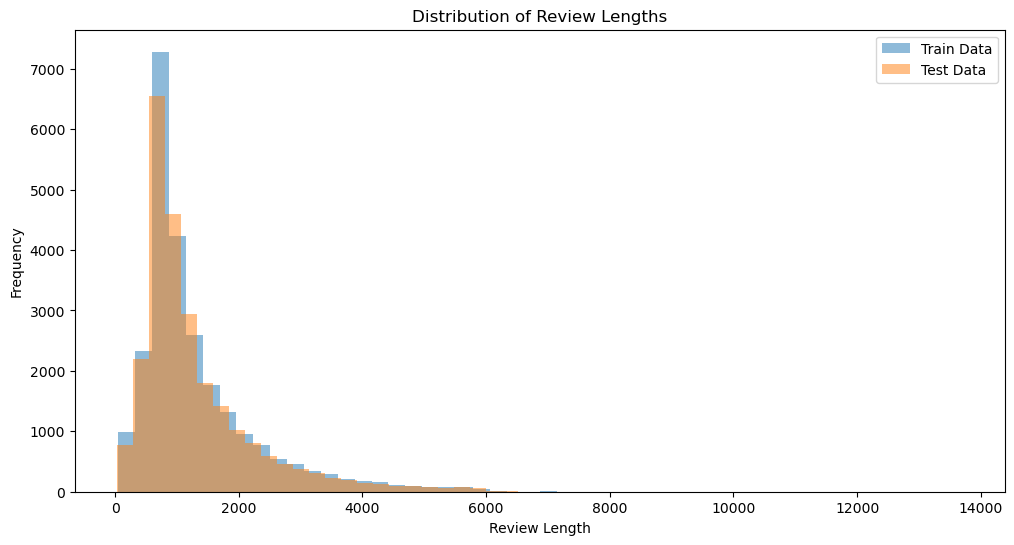

In [14]:
import matplotlib.pyplot as plt

# 计算每个评论的长度
df_train['length'] = df_train['text'].apply(len)
df_test['length'] = df_test['text'].apply(len)

# 绘制评论长度分布图
plt.figure(figsize=(12, 6))
plt.hist(df_train['length'], bins=50, alpha=0.5, label='Train Data')
plt.hist(df_test['length'], bins=50, alpha=0.5, label='Test Data')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Review Lengths')
plt.show()


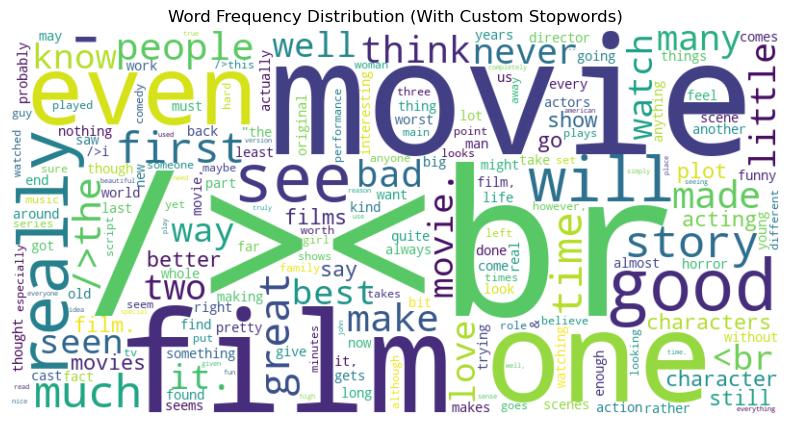

In [40]:
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter

# 合并所有评论文本
all_text = ' '.join(df_train['text'])

# 将文本转换为小写并分词
all_words = all_text.lower().split()


# 去除停用词
filtered_words = [word for word in all_words if word not in STOPWORDS]

# 统计词频
word_counts = Counter(filtered_words)

# 生成词云
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate_from_frequencies(word_counts)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Frequency Distribution (With Custom Stopwords)')
plt.show()

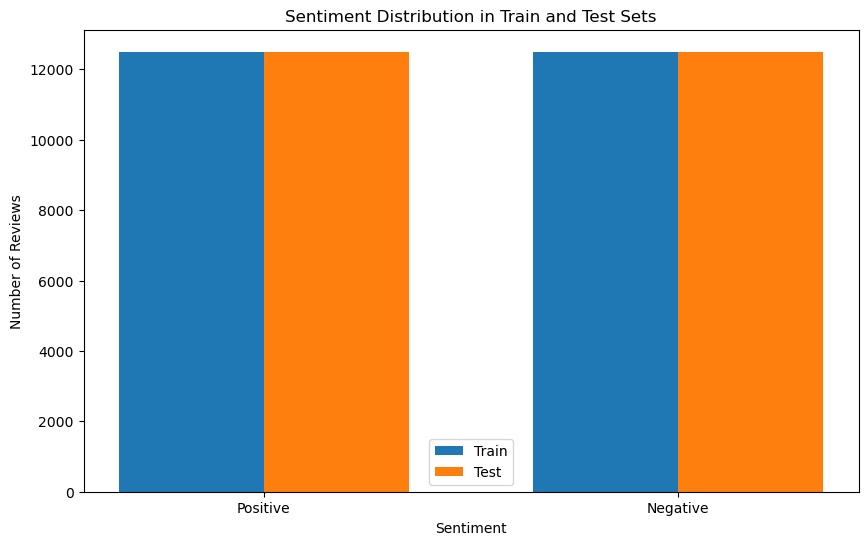

In [42]:
import seaborn as sns
import numpy as np
# 计算正负面评论的数量
train_pos = df_train['label'].sum()
train_neg = len(df_train) - train_pos
test_pos = df_test['label'].sum()
test_neg = len(df_test) - test_pos

# 创建情感分布条形图
labels = ['Positive', 'Negative']
train_counts = [train_pos, train_neg]
test_counts = [test_pos, test_neg]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_counts, width, label='Train')
rects2 = ax.bar(x + width/2, test_counts, width, label='Test')

ax.set_xlabel('Sentiment')
ax.set_ylabel('Number of Reviews')
ax.set_title('Sentiment Distribution in Train and Test Sets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


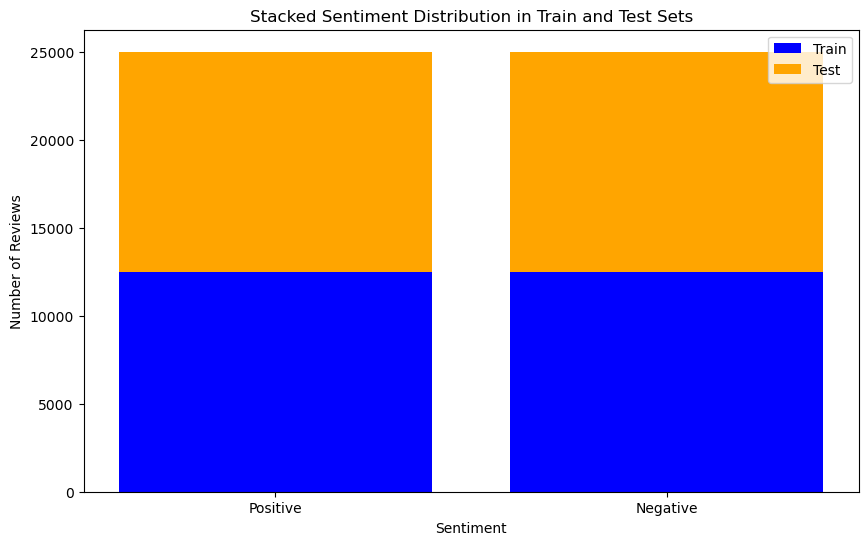

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# 计算训练集和测试集的正负面评论数量
train_pos = df_train['label'].sum()
train_neg = len(df_train) - train_pos
test_pos = df_test['label'].sum()
test_neg = len(df_test) - test_pos

# 创建堆叠条形图
labels = ['Positive', 'Negative']
train_counts = [train_pos, train_neg]
test_counts = [test_pos, test_neg]

x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))

# 堆叠条形图
ax.bar(x, train_counts, label='Train', color='blue')
ax.bar(x, test_counts, bottom=train_counts, label='Test', color='orange')

ax.set_xlabel('Sentiment')
ax.set_ylabel('Number of Reviews')
ax.set_title('Stacked Sentiment Distribution in Train and Test Sets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()
